In [47]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [2]:
np.random.seed(42)

In [25]:
#This is a really easy case
X, y= sklearn.datasets.make_blobs(n_samples=400, cluster_std=.3, centers=[(2,2),(4,2)])

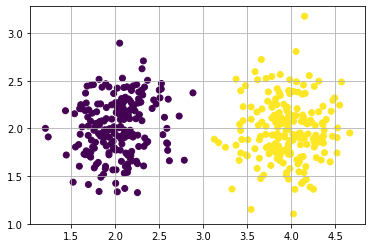

In [26]:
plt.grid()
plt.scatter(X[:,0],X[:,1],c=y)

In [28]:
X

array([[2.16466515, 1.92351326],
       [1.61012563, 2.24891973],
       [1.99584868, 1.79308167],
       [1.84910757, 2.07904616],
       [3.83333597, 2.06131671],
       [3.84063571, 2.145163  ],
       [2.02278658, 2.22280473],
       [2.61696307, 1.66073347],
       [3.71532504, 2.52420896],
       [4.52048097, 1.74296837],
       [2.0114714 , 1.56542258],
       [1.52420501, 1.43602268],
       [1.66504267, 2.37074349],
       [3.6536912 , 1.47445136],
       [4.05515035, 2.8079101 ],
       [2.07239658, 1.65469577],
       [3.85265388, 1.91453735],
       [1.66323656, 1.72474915],
       [3.40987909, 1.66484406],
       [1.98715299, 2.01740682],
       [1.69743359, 1.41121229],
       [2.37123144, 1.8628095 ],
       [4.31461214, 2.49662213],
       [4.08868735, 1.54500724],
       [3.50815475, 1.88225867],
       [2.23711157, 2.10201539],
       [4.3125174 , 2.17506329],
       [4.02556283, 1.10265921],
       [4.36007852, 1.86105159],
       [3.61205754, 2.17171709],
       [4.

In [29]:
len(distance.cdist(X[[0,1]], X).argmax(axis=0))

400

In [40]:
class Node():
    def __init__(self, parent, data_pt_i, radius, n_elements, data_i=None):
        self.parent=parent
        self.right=None
        self.left=None
        #payload
        self.data = data_i #this field is only meaningful if it is a leaf node
        self.data_pt = data_pt_i #the point
        self.radius = radius#the radius of points nearby
        self.n_elements = n_elements#including this point

In [92]:
class Ball_Tree():
    def __init__(self, X, min_pts):
        self.X = X
        self.min_pts = min_pts
        centroid = self.X.mean(axis=0)
        center_pt_i = distance.cdist(centroid.reshape(1,-1), self.X).argmax()
        radius = distance.cdist(X[center_pt_i].reshape(1,-1), self.X).max()
        self.root = self.create_node(None, center_pt_i, radius, np.arange(X.shape[0]))
        
    def find_new_nodes(self, data_subset_i):
        centroid = self.X[data_subset_i].mean(axis=0)
        print(centroid)
        node1_i = data_subset_i[distance.cdist(centroid.reshape(1,-1), self.X[data_subset_i]).argmax()]
        node2_i = data_subset_i[distance.cdist(self.X[node1_i].reshape(1,-1), self.X[data_subset_i]).argmax()]
        radius = distance.euclidean(self.X[node1_i], self.X[node2_i])/2
        return node1_i, node2_i, radius
    
    def split_data(self, node1_i, node2_i, data_subset_i):
        cluster_assignments = distance.cdist(self.X[[node1_i, node2_i]], self.X[data_subset_i]).argmax(axis=0) 
        #gives 0 if closer to node_1, 1 if closer to node_2
        cl1 = data_subset_i[np.nonzero(cluster_assignments == 0)]
        cl2 = data_subset_i[np.nonzero(cluster_assignments == 1)]
        return cl1, cl2
    
    def create_node(self, parent_node, data_pt_i, radius, data_subset_i):
        if len(data_subset_i) <= self.min_pts:
            #Base Case
            return Node(parent_node, self.X[data_pt_i], radius, data_subset_i.shape[0], data_subset_i)
        else:
            #Create More Nodes
            data_pt1_i, data_pt2_i, split_radius = self.find_new_nodes(data_subset_i)
            data_subset1_i, data_subset2_i = self.split_data(data_pt1_i, data_pt2_i, data_subset_i)
            print(len(data_subset1_i), len(data_subset2_i), len(data_subset_i))
            current_node = Node(parent_node,data_pt_i, radius, data_subset_i.shape[0])
            current_node.right = self.create_node(parent_node, data_pt1_i, radius, data_subset1_i)
            current_node.left = self.create_node(parent_node, data_pt2_i, radius, data_subset2_i)
            return current_node

In [1]:
tree = Ball_Tree(X, 1)

NameError: name 'Ball_Tree' is not defined